A Time Series:
 [1] 580.38 581.86 580.97 580.80 579.79 580.39 580.42 580.82 581.40 581.32
[11] 581.44 581.68 581.17 580.53 580.01 579.91 579.14 579.16 579.55 579.67
[21] 578.44 578.24 579.10 579.09 579.35 578.82 579.32 579.01 579.00 579.80
[31] 579.83 579.72 579.89 580.01 579.37 578.69 578.19 578.67 579.55 578.92
[41] 578.09 579.37 580.13 580.14 579.51 579.24 578.66 578.86 578.05 577.79
[51] 576.75 576.75 577.82 578.64 580.58 579.48 577.38 576.90 576.94 576.24
[61] 576.84 576.85 576.90 577.79 578.18 577.51 577.23 578.42 579.61 579.05
[71] 579.26 579.22 579.38 579.10 577.95 578.12 579.75 580.85 580.41 579.96
[81] 579.61 578.76 578.18 577.21 577.13 579.10 578.25 577.91 576.89 575.96
[91] 576.80 577.68 578.38 578.52 579.74 579.31 579.89 579.96

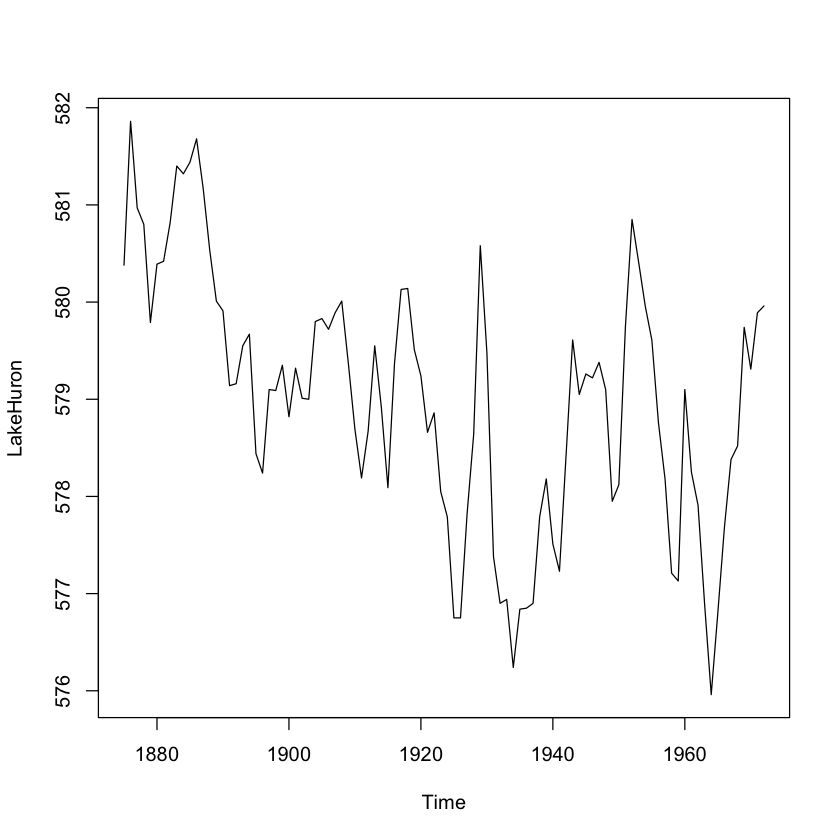

In [28]:
LakeHuron
plot(LakeHuron)

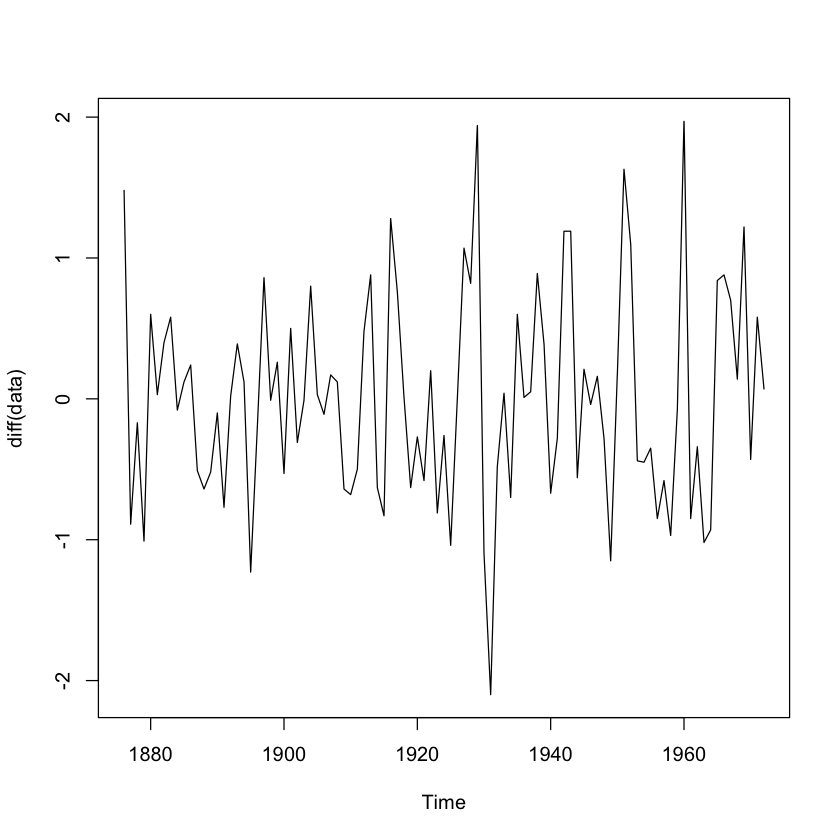

In [29]:
data<- LakeHuron
plot(diff(data))

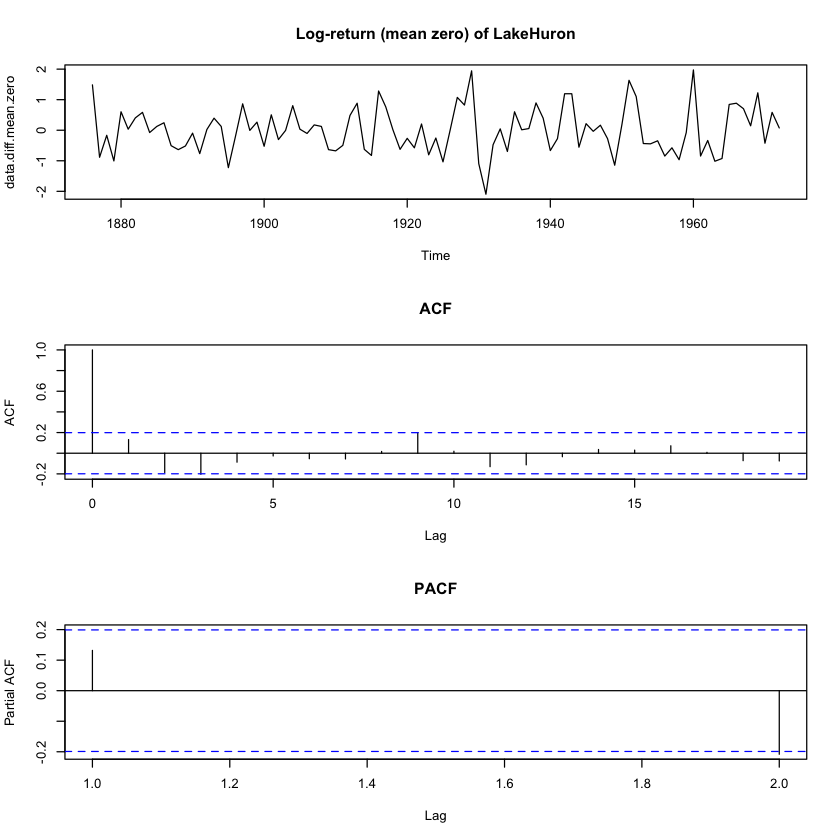

In [40]:
data.diff=diff(data)
data.diff.mean.zero=data.diff-mean(data.diff)

par(mfrow=c(3,1))
plot(data.diff.mean.zero, main='Log-return (mean zero) of LakeHuron')
acf(data.diff.mean.zero, main='ACF')
pacf(data.diff.mean.zero, main='PACF', lag.max=2)

In [41]:
acf(data.diff.mean.zero, plot=F)$acf[1:(3)]

[1]  1.0000000  0.1319241 -0.1870874

In [42]:
# Order
p=2

In [43]:
# sample autocorreleation function r
r=NULL
r[1:p]=acf(data.diff.mean.zero, plot=F)$acf[2:(p+1)]
r

[1]  0.1319241 -0.1870874

In [44]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 2 by 2, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

1.0000000,0.1319241
0.1319241,1.0000000


In [45]:
# b-column vector on the right
b=matrix(r,p,1)# b- column vector with no entries
b

0.1319241
-0.1870874


In [46]:
phi.hat=solve(R,b)[,1]
phi.hat

[1]  0.1593793 -0.2081134

In [47]:
# Variance estimation using Yule-Walker Estimator
c0=acf(data.diff.mean.zero, type='covariance', plot=F)$acf[1]
c0
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.5552905

[1] 0.5219945

In [48]:
# Constant term in the model
phi0.hat=mean(data.diff.mean.zero)*(1-sum(phi.hat))
phi0.hat

[1] 3.96909e-18

In [49]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 3.96909e-18  Coeffcinets: 0.1593793 -0.2081134  and Variance: 0.5219945 
